### 3D particle track

To propagate the particles in 3 dimentions, a Python class has been defined, called Vector. \
The class is initialized assigning the starting position and direction through the 5 parameters. \
It has has attributes that store these quantities, as well as one which stores the radial distance from the z axis. \
\
A method of the class, called `update_pos` propagates the particle one step further along its direction, where the step length can be specified. \
\
Another method called `in_tank` has been defined to keep track of whether the particle is inside the detector volume.            

In [1]:
import numpy as np 
from astropy import units as u 
import matplotlib.pyplot as plt

# Define a class that describes a 3D vector  

class Vector():
    
    def __init__(self,x0,y0,z0,zenith,azimuth):
        self.x = x0
        self.y = y0
        self.z = z0
        self.theta = zenith 
        self.phi = azimuth
        self.r = np.sqrt(self.x*self.x + self.y*self.y)
        
    def update_pos(self,step_size): 
        self.x = self.x + step_size * np.sin(self.theta)*np.cos(self.phi)  
        self.y = self.y + step_size * np.sin(self.theta)*np.sin(self.phi)
        self.z = self.z + step_size * np.cos(self.theta)
        self.r = np.sqrt(self.x*self.x + self.y*self.y)
        
    def in_tank(self):
        r_tank = 180 * u.cm
        h_tank = 120 * u.cm 
        if self.z >= 0. * u.cm  and self.z <= h_tank and self.r <= r_tank: 
            return True 
        else: 
            return False 
                    

In [33]:
# Tank dimentions 
R_tank = 180 * u.cm 
H_tank = 120 * u.cm

# Gen. surface radius 
R_gen = 220 * u.cm 
z_gen = 200 * u.cm 

N_event = 100

def rnd_tank_start(R_tank, N_event): 
    r = R_gen * np.sqrt(np.random.uniform(0,1,size=N_event))
    alpha = np.random.uniform(0,2*np.pi, size=N_event) 
    x0 = r * np.cos(alpha)   
    y0 = r * np.sin(alpha)  
    z0 = np.full(N_event,z_gen.value) * u.cm 
    return x0, y0, z0 

def rnd_direction(N_event):
    phi = np.random.uniform(0,2*np.pi, size=N_event)

    theta_0 = 0 * u.deg 
    theta_1 = 30 * u.deg 
    cos_theta_squared = np.random.uniform(np.cos(theta_1.to(u.rad))**2,np.cos(theta_0.to(u.rad))**2, size=N_event)
    cos_theta = np.sqrt(cos_theta_squared)
    theta = np.arccos(cos_theta) 
    return theta, phi


In [34]:
muon_theta, muon_phi = rnd_direction(N_event)
x0,y0,z0 = rnd_tank_start(R_gen, N_event)  

In [35]:
coor_plot = []

for i in range(N_event) :
    muon_pos = Vector(x0[i],y0[i],z0[i],muon_theta[i],muon_phi[i]) 
    step_size = -1. * u.cm

    while(muon_pos.z > 0 *u.cm): 

        muon_pos.update_pos(step_size) 

        while (muon_pos.in_tank()):
            coor_plot.append([muon_pos.x.value,muon_pos.y.value,muon_pos.z.value])
            muon_pos.update_pos(step_size) 

        
coor_array = np.asarray(coor_plot)         

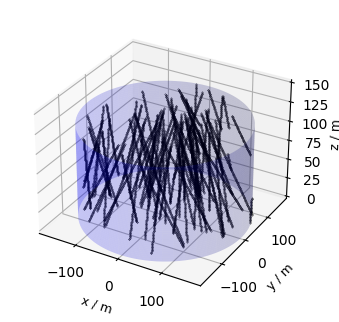

In [36]:
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim([-180, 180])
ax.set_ylim([-180, 180])
ax.set_zlim([0, 150])

# Create data for the cylinder
theta_tank = np.linspace(0, 2 * np.pi, 100)  # Angle around the cylinder
z_tank = np.linspace(0, H_tank, 50)               # Height along the cylinder
theta_tank_grid, z_tank_grid = np.meshgrid(theta_tank, z_tank)        # Create a grid for theta and z

# Convert to Cartesian coordinates
x_tank = R_tank * np.cos(theta_tank)
y_tank = R_tank * np.sin(theta_tank)

# Plot the cylinder
ax.plot_surface(x_tank, y_tank, z_tank_grid, color='b', alpha=0.2, linewidth=0)
ax.set_xlabel('x / m',size=9)
ax.set_ylabel('y / m',size=9)
ax.set_zlabel('z / m',size=9, labelpad=1)
ax.set_box_aspect(None, zoom=0.95)

ax.plot(coor_array[:,0],coor_array[:,1], zs=coor_array[:,2], linestyle='', color = 'black', marker='.',markersize=0.5)

